# Анализ оттока клиентов

Перед нами датасет с информацией о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Нам предстоит проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка. 
Цель анализа - продлить жизненный цикл клиентов.

**План.**
1. [Загрузить данные и изучить общую информацию.](#section_id_1)<br>
2. [Выполнить предобработку данных.](#section_id_2)<br>
* 2.1. Провести анализ на явные и неявные дубликаты.<br>
* 2.2. Исследовать данные на наличие пропусков.<br>
* 2.3. Найти аномальные значения в данных.<br>
3. [Провести исследовательский анализ данных.](#section_id_3)<br>
* 3.1. Построить распределения зависимости категорий от оттока клиентов. Посчитать показатель оттока. Составим портреты отточных клиентов и оставшихся. Сравним получившиеся картины<br>
* 3.2. Построить матрицы корреляции и определить категории корреляции для отечного и неотложного клиента.<br>
4. [Провести статистические гипотезы.](#section_id_4)<br>
* 4.1. Гипотезы относительно среднего дохода.<br>
* 4.2. Гипотезы относительно среднего возраста.<br>
5. [Промежуточный итог.](#section_id_5)<br>
6. [Провести сегментацию клиентов.](#section_id_6)<br>
* 6.1 Выделить сегмент 1.<br>
* 6.2. Выделить сегмент 2.<br>
* 6.3. Выделить сегмент 3.<br>
7. [Сделать выводы и дать рекомендации.](#section_id_7)

**Описание данных**
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `equity`  — количество баллов собственности
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` / `last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет (1 - ушёл, 0 - нет).

## 1. Загрузка данных и изучение общей информации.<a id='section_id_1'></a>

Изучим общую информацию о датасете. Приведём названия столбцов к нижнему регистру и проверим типы данных.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [3]:
try:
    df = pd.read_csv('bank_scrooge.csv')
except: FilePathError
df.columns = map(str.lower, df.columns)
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
est_salary,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


In [6]:
df['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

In [7]:
df['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

- В датафреме представлено 10 тыс. значений.<br>
- Женцин и мужчин поровну.<br>
- Клиенты распределены между городами 58%:27%:15% Ярославль:Рыбинск:Ростов.<br>
- Баллы кредитного скоринга отсчитываются от 642 до 1000, медиана 853.<br>
- Возраст клиентов от 18 до 86 лет, медиана 40.<br>
- Количество баллов собственности отражено диапазоном от 0 до 9, медиана 3.<br>
- Баланс от 0 до 119 млн., медиана 524тыс.<br>
- Количество продуктов от 0 до 5, медиана 2.<br>
- Оценённая заработная плата от 2500 до 1,3млн., медиана 119тыс. 

Названия столбцов переведены в нижний регистр. Типы данных не требуют изменений.

## 2. Предобработка данных.<a id='section_id_2'></a>

**2.1. Проведём анализ данных на явные и неявные дубликаты.**

In [8]:
print('Число полных дубликатов - ', df.duplicated().sum())

Число полных дубликатов -  0


Для того, чтобы проверить данные на неявные дубликаты проверим уникальные значения в категориальных переменных города и пола. Проверим на дубликаты по трём столбцам: идентификатор пользователя, город, пол.

In [9]:
print('Уникальные значения по городам:', df['city'].unique())
print('Уникальные значения по полу:', df['gender'].unique())

Уникальные значения по городам: ['Рыбинск' 'Ярославль' 'Ростов']
Уникальные значения по полу: ['Ж' 'М']


In [10]:
df[df[['userid','city', 'gender']].duplicated(keep=False)]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


* Определим количество дубликатов по идентификатору пользователя.

In [11]:
print('Количество дубликатов по userid:', df.shape[0] - df['userid'].nunique())
print('Процент дубликатов по userid относительно всего датасета:', 
      ((df.shape[0] - df['userid'].nunique())/df.shape[0])*100, '%')

Количество дубликатов по userid: 73
Процент дубликатов по userid относительно всего датасета: 0.73 %


In [12]:
df[df['userid'].duplicated(keep=False)].sort_values(by='userid').head(6)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1


In [13]:
print('Количество дубликатов по идентьификатору пользователя:', 
      df[df['userid'].duplicated(keep=False)].sort_values(by='userid').shape[0])

Количество дубликатов по идентьификатору пользователя: 146


Дубликаты повторяются по 2 раза. Можно предположить, что это перезаписанные пользователи или техническая ошибка. В силу процентной малости (менее 1%) и в виду того, что непосредственно userid не будет использован в анализе, оставим дубликаты без изменения.

**2.2. Исследуем данные на наличие пропусков.**

In [14]:
df.isna().sum().sort_values(ascending = False)

balance          2295
age                26
userid              0
score               0
city                0
gender              0
equity              0
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [15]:
df[df.isna().any(axis=1)].shape[0]

2305

Можно сказать что 2295+26-2305=16 клиентов имеют пропуски в двух категориях: баланс и возраст. Рассмотрим пропуски в разрезе других категорий. В силу малости пропусков в возрасте обратим внимание на пропуски в балансе.

In [16]:
df_pass_in_balance = df[df['balance'].isnull() == True]

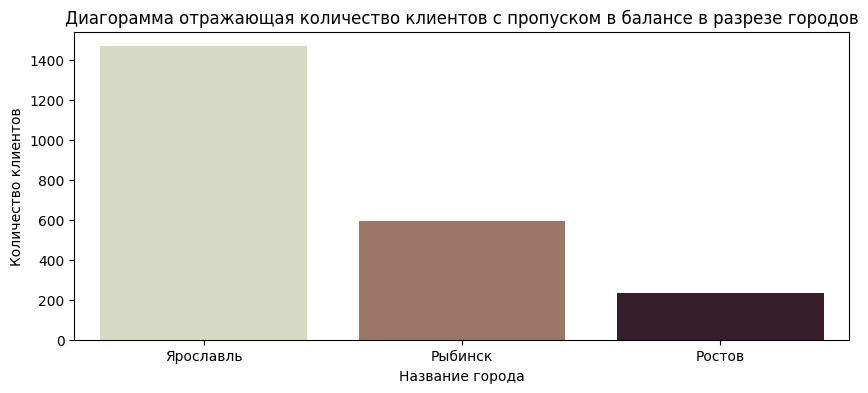

In [17]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_pass_in_balance, x='city', palette='ch:.50',
order=df_pass_in_balance.groupby('city')['products'].agg('count').sort_values(ascending=False).index)
plt.title('Диагорамма отражающая количество клиентов с пропуском в балансе в разрезе городов')
plt.xlabel('Название города')
plt.ylabel('Количество клиентов');

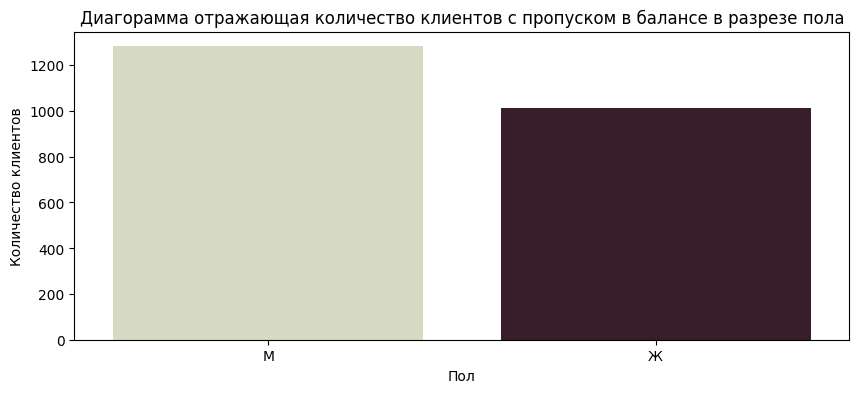

In [18]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_pass_in_balance, x='gender', palette='ch:.50',
order=df_pass_in_balance.groupby('gender')['products'].agg('count').sort_values(ascending=False).index)
plt.title('Диагорамма отражающая количество клиентов с пропуском в балансе в разрезе пола')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов');

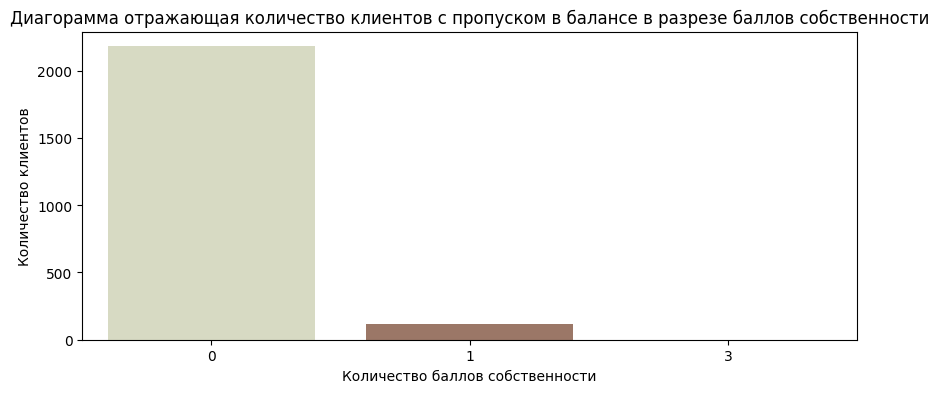

In [19]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_pass_in_balance, x='equity', palette='ch:.50',
order=df_pass_in_balance.groupby('equity')['products'].agg('count').sort_values(ascending=False).index)
plt.title('Диагорамма отражающая количество клиентов с пропуском в балансе в разрезе баллов собственности')
plt.xlabel('Количество баллов собственности')
plt.ylabel('Количество клиентов');

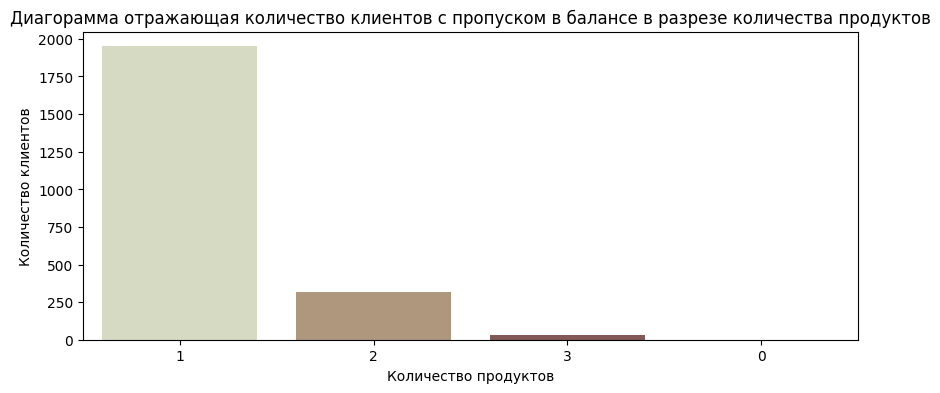

In [20]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_pass_in_balance, x='products', palette='ch:.50',
order=df_pass_in_balance.groupby('products')['products'].agg('count').sort_values(ascending=False).index)
plt.title('Диагорамма отражающая количество клиентов с пропуском в балансе в разрезе количества продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов');

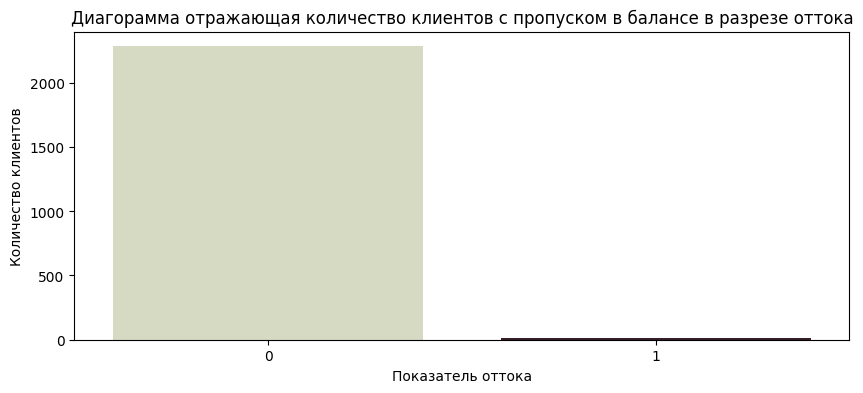

In [21]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_pass_in_balance, x='churn', palette='ch:.50',
order=df_pass_in_balance.groupby('churn')['products'].agg('count').sort_values(ascending=False).index)
plt.title('Диагорамма отражающая количество клиентов с пропуском в балансе в разрезе оттока')
plt.xlabel('Показатель оттока')
plt.ylabel('Количество клиентов');

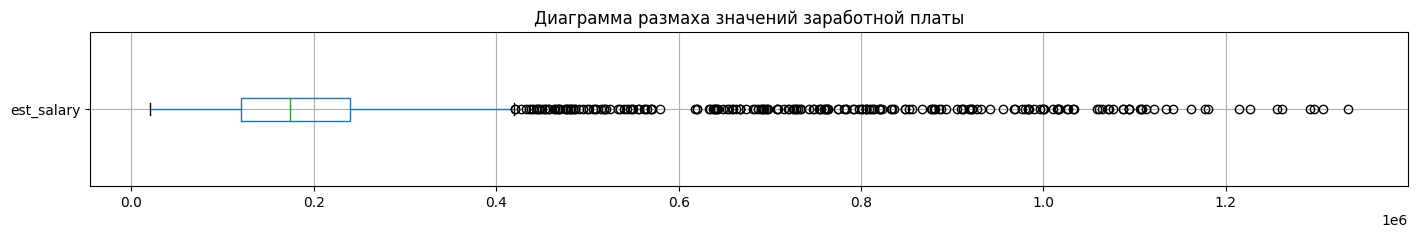

In [22]:
fig, ax = plt.subplots(figsize = (17,2))
ax = df_pass_in_balance.boxplot(column='est_salary', vert = False, ax =ax)
ax.set_title(f'Диаграмма размаха значений заработной платы');

In [23]:
df_pass_in_balance['est_salary'].describe()

count    2.295000e+03
mean     2.263102e+05
std      1.997718e+05
min      2.027403e+04
25%      1.203477e+05
50%      1.741607e+05
75%      2.400150e+05
max      1.333687e+06
Name: est_salary, dtype: float64

Чаще всего пропуски в категории баланс на счёте встречается у пользователей из Ярославля, мужского пола, малым баллом собственности и одним продуктом. Клиенты имеют медианную зарплату в 170.000 руб. Так же важно что такие клиенты почти все неотточные.
Ярославль самый большой город из нашей выборки, поэтому приоретизация города может оказаться случайной. Различия в категории пол есть, но они не велики. Бо́льшая зависимость наблюдается в количестве баллов собственности, количестве продуктов банка и показателе оттока.

* Посмотрим как изменятся средние и медианные показатели некоторых категорий при отбросе пропуков.

In [24]:
df_without_passes = df.dropna()
df_without_passes.shape[0]

7695

In [25]:
print('Среднее баланса:', df_without_passes['balance'].mean())
print('Среднее баланса всего датафрейма:', df['balance'].mean())
print('Медиана баланса:', df_without_passes['balance'].median())
print('Медиана баланса всего датафрейма:', df['balance'].median())

Среднее баланса: 827245.5875152696
Среднее баланса всего датафрейма: 827794.3065100583
Медиана баланса: 524295.33
Медиана баланса всего датафрейма: 524272.2


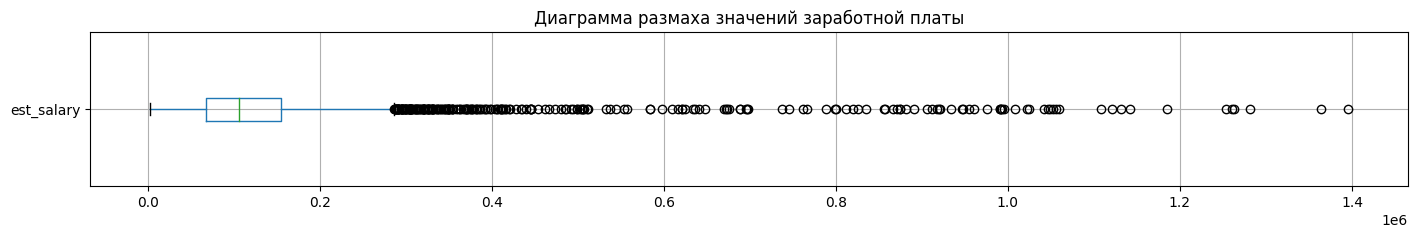

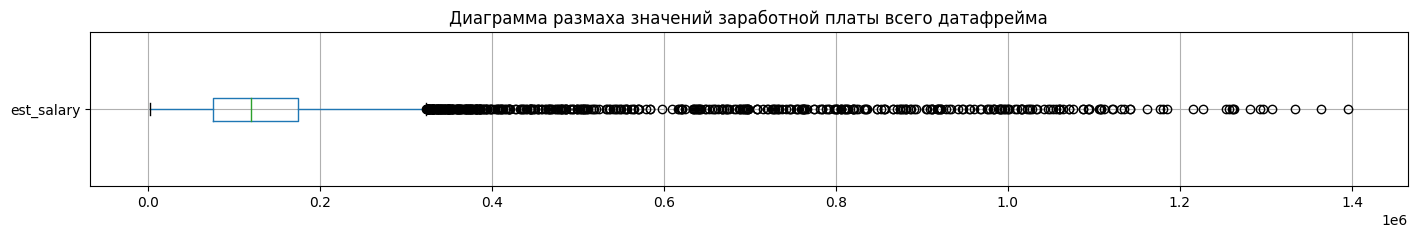

In [26]:
fig, ax = plt.subplots(figsize = (17,2))
ax = df_without_passes.boxplot(column='est_salary', vert = False, ax =ax)
ax.set_title(f'Диаграмма размаха значений заработной платы') 
fig, ax = plt.subplots(figsize = (17,2))
ax = df.boxplot(column='est_salary', vert = False, ax =ax)
ax.set_title(f'Диаграмма размаха значений заработной платы всего датафрейма');

Сильной зависимости пропусков от какой либо категории не найдено. Так же мы не можем утверждать вероятность пропусков полной случайностью, так как некоторые закономерности внутри пропусков есть. Вероятнее всего пропуски являются видом MAR (Missing At Random). Пропуски имеют некую зависимость от категорий, не содержащих пропуски. Есть некоторый приоритет у нескольких категорий в пропусках. Примем решение пропуски не удалять и не заменять, так как удалив пятую часть датафрейма мы потеряем многие другие важные для анализа данные.

**2.3. Найдём аномальные значения в данных.**

In [27]:
print('Минимальный балл кредитного скоринга:', df['score'].min())
print('Максимальный балл кредитного скоринга:', df['score'].max())

Минимальный балл кредитного скоринга: 642.0
Максимальный балл кредитного скоринга: 1000.0


In [28]:
print('Статистика по возрасту')
print(df['age'].describe())

Статистика по возрасту
count    9974.000000
mean       42.734409
std        12.179971
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64


In [29]:
print('Уникальные значения баллов собственности')
print(df['equity'].unique())

Уникальные значения баллов собственности
[1 5 0 4 3 2 6 7 8 9]


In [30]:
print('Уникальные значения количества продуктов')
print(df['products'].unique())

Уникальные значения количества продуктов
[2 3 1 4 5 0]


In [31]:
print('Минимальное значение баланса на счёте:', df['balance'].min())
print('Максимальное значение баланса на счёте:', df['balance'].max())

Минимальное значение баланса на счёте: 0.0
Максимальное значение баланса на счёте: 119113552.01


In [32]:
print('Корреляция между балансом и заработной платой')
print(round(df['balance'].corr(df['est_salary']), 2))

Корреляция между балансом и заработной платой
0.34


Наблюдается умеренная связь.

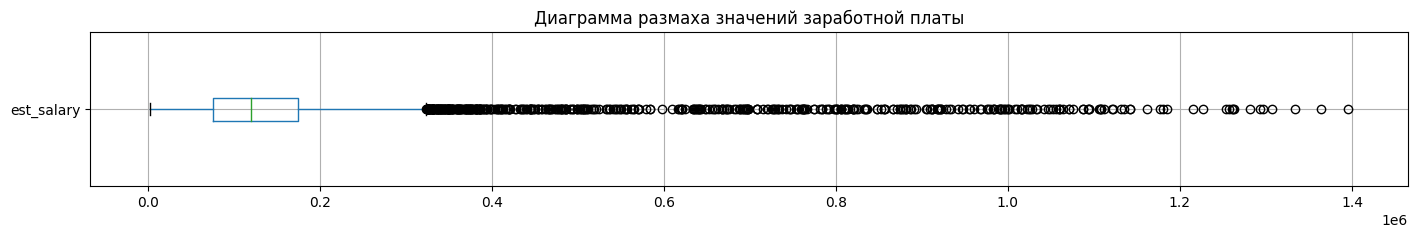

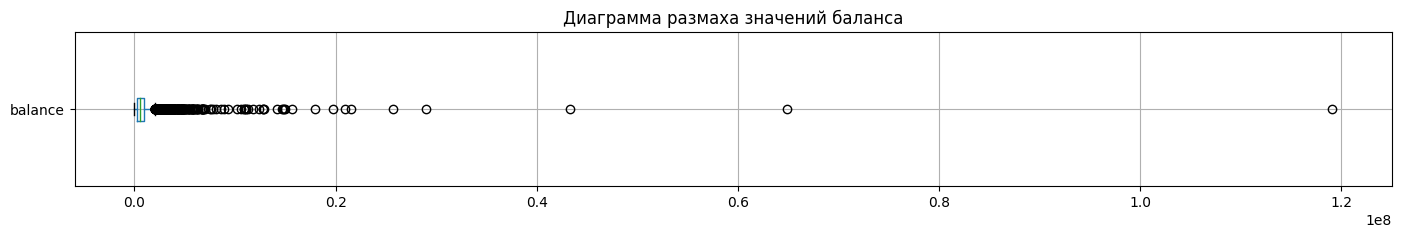

In [33]:
fig, ax = plt.subplots(figsize = (17,2))
ax = df.boxplot(column='est_salary', vert = False, ax =ax)
ax.set_title(f'Диаграмма размаха значений заработной платы') 
fig, ax = plt.subplots(figsize = (17,2))
ax = df.boxplot(column='balance', vert = False, ax =ax)
ax.set_title(f'Диаграмма размаха значений баланса');

Установим границу для аномальных значений по балансу в 8 млн. руб., а для значений для оценённой заработной платы в 1млн. руб.

In [34]:
df.drop(df[(df['balance'] > 6000000)].index, inplace=True)
df.drop(df[(df['est_salary'] > 1000000)].index, inplace=True)

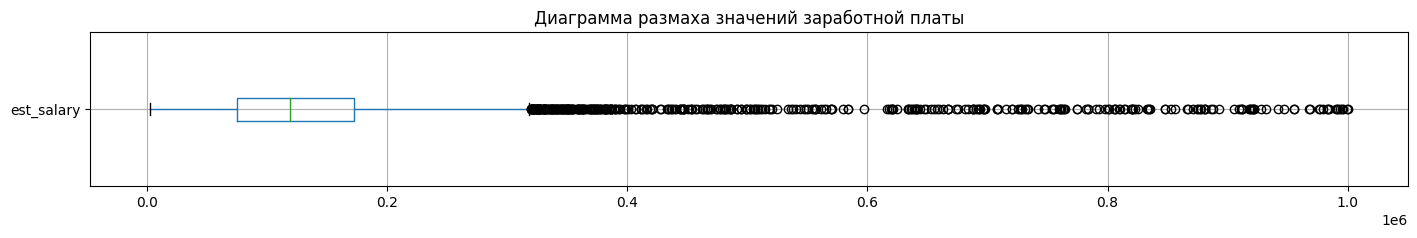

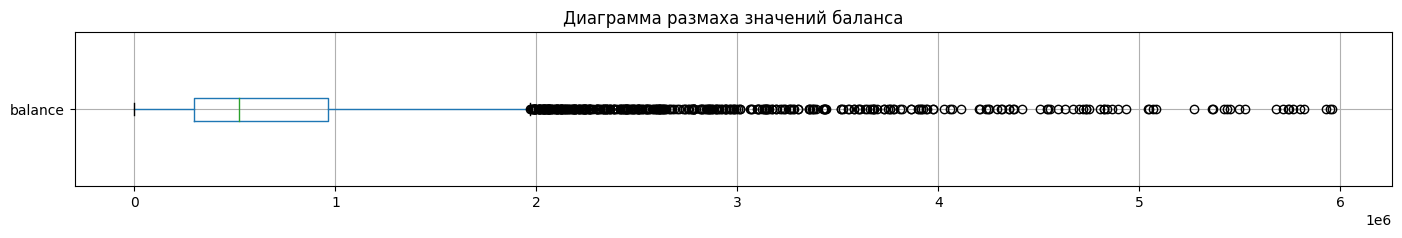

In [35]:
fig, ax = plt.subplots(figsize = (17,2))
ax = df.boxplot(column='est_salary', vert = False, ax =ax)
ax.set_title(f'Диаграмма размаха значений заработной платы') 
fig, ax = plt.subplots(figsize = (17,2))
ax = df.boxplot(column='balance', vert = False, ax =ax)
ax.set_title(f'Диаграмма размаха значений баланса');

In [36]:
df.shape[0]

9900

In [37]:
print('Процент отброшенных банных:', 100 - df.shape[0]/100, '%')

Процент отброшенных банных: 1.0 %


## 3. Исследовательский анализ данных.<a id='section_id_3'></a>

**3.1. Построим распределения зависимости категорий от оттока клиентов. Посчитаем показатель оттока. Составим портреты отточных клиентов и оставшихся. Сравним получившиеся картины**

* Анализ относительно пола клиентов.

In [38]:
df_gender_M = df.query('gender == "М"').groupby('churn').agg({'userid': 'count'}
                                                            ).sort_values(by='userid', ascending=False).reset_index()
df_gender_M['ratio'] = round(df_gender_M['userid']/df_gender_M['userid'].sum(), 2)
df_gender_M

,churn,userid,ratio
0,0,3777,0.76
1,1,1164,0.24


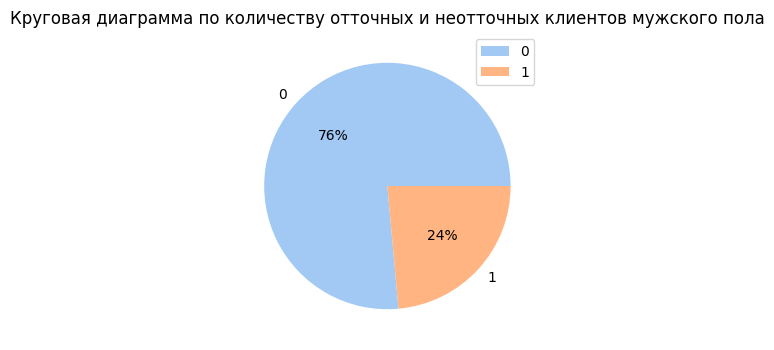

In [39]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette('pastel')[ 0:5 ]
plt.pie(labels = df_gender_M['churn'], x=df_gender_M['userid'], autopct='%.0f%%', colors=colors)
plt.legend()
plt.title('Круговая диаграмма по количеству отточных и неотточных клиентов мужского пола')
plt.show();

In [40]:
df_gender_F = df.query('gender == "Ж"').groupby('churn').agg({'userid': 'count'}
                                                            ).sort_values(by='userid', ascending=False).reset_index()
df_gender_F['ratio'] = round(df_gender_F['userid']/df_gender_F['userid'].sum(), 2)
df_gender_F

,churn,userid,ratio
0,0,4326,0.87
1,1,633,0.13


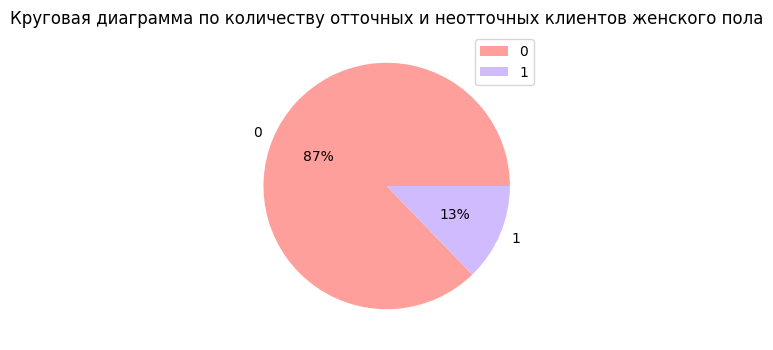

In [41]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette('pastel')[ 3:7 ]
plt.pie(labels = df_gender_F['churn'], x=df_gender_F['userid'], autopct='%.0f%%', colors=colors)
plt.legend()
plt.title('Круговая диаграмма по количеству отточных и неотточных клиентов женского пола')
plt.show();

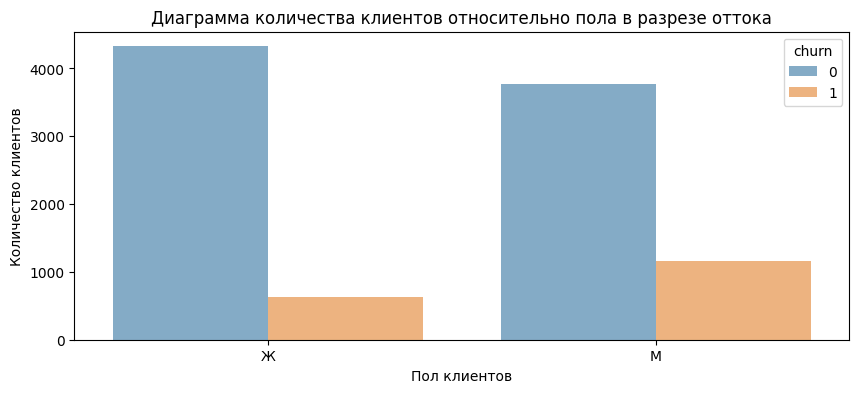

In [42]:
plt.figure(figsize=(10, 4))
sns.countplot(x='gender', data=df, hue='churn', alpha=.6)
plt.title('Диаграмма количества клиентов относительно пола в разрезе оттока')
plt.xlabel('Пол клиентов')
plt.ylabel('Количество клиентов');

* Анализ относительно города клиентов

In [43]:
df_city_R = df.query('city == "Рыбинск"').groupby('churn').agg({'userid': 'count'}
                                                            ).sort_values(by='userid', ascending=False).reset_index()
df_city_R['ratio'] = round(df_city_R['userid']/df_city_R['userid'].sum(), 2)
df_city_R

,churn,userid,ratio
0,0,2252,0.84
1,1,436,0.16


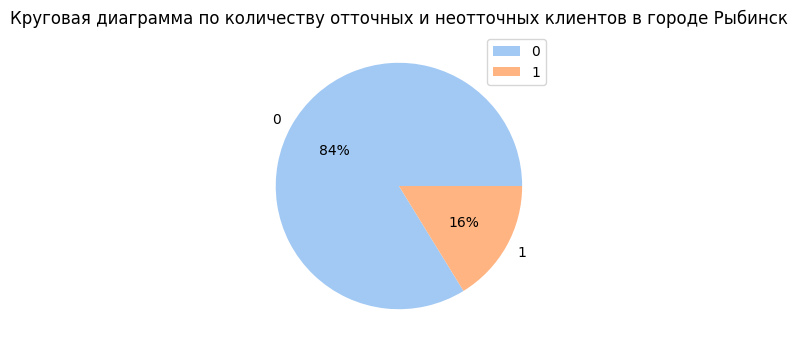

In [44]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette('pastel')[ 0:5 ]
plt.pie(labels = df_city_R['churn'], x=df_city_R['userid'], autopct='%.0f%%', colors=colors)
plt.legend()
plt.title('Круговая диаграмма по количеству отточных и неотточных клиентов в городе Рыбинск')
plt.show();

In [45]:
df_city_Ro = df.query('city == "Ростов"').groupby('churn').agg({'userid': 'count'}
                                                            ).sort_values(by='userid', ascending=False).reset_index()
df_city_Ro['ratio'] = round(df_city_Ro['userid']/df_city_Ro['userid'].sum(), 2)
df_city_Ro

,churn,userid,ratio
0,0,1151,0.81
1,1,265,0.19


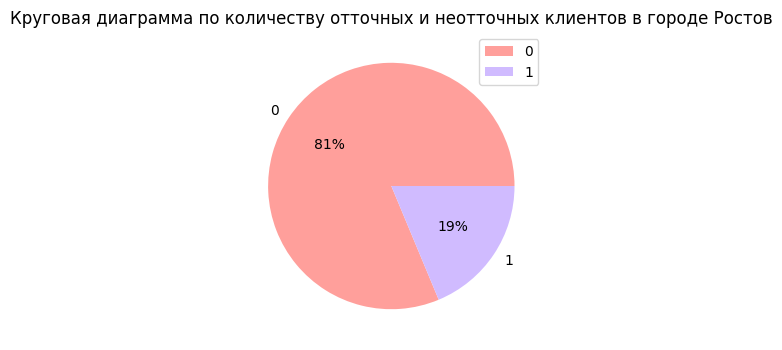

In [46]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette('pastel')[ 3:7 ]
plt.pie(labels = df_city_Ro['churn'], x=df_city_Ro['userid'], autopct='%.0f%%', colors=colors)
plt.legend()
plt.title('Круговая диаграмма по количеству отточных и неотточных клиентов в городе Ростов')
plt.show();

In [47]:
df_city_Y = df.query('city == "Ярославль"').groupby('churn').agg({'userid': 'count'}
                                                            ).sort_values(by='userid', ascending=False).reset_index()
df_city_Y['ratio'] = round(df_city_Y['userid']/df_city_Y['userid'].sum(), 2)
df_city_Y

,churn,userid,ratio
0,0,4700,0.81
1,1,1096,0.19


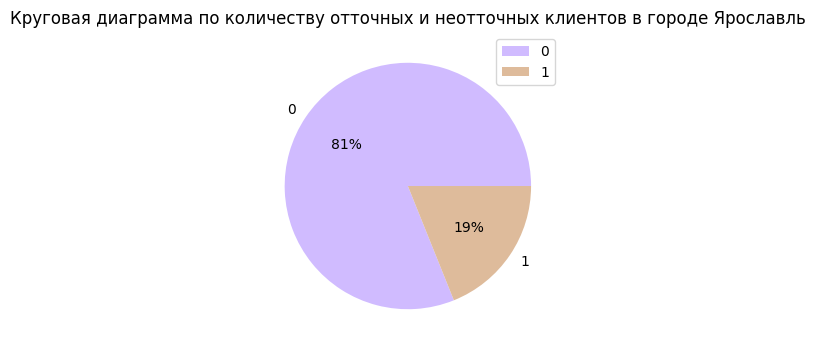

In [48]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette('pastel')[ 4:15 ]
plt.pie(labels = df_city_Y['churn'], x=df_city_Y['userid'], autopct='%.0f%%', colors=colors)
plt.legend()
plt.title('Круговая диаграмма по количеству отточных и неотточных клиентов в городе Ярославль')
plt.show();

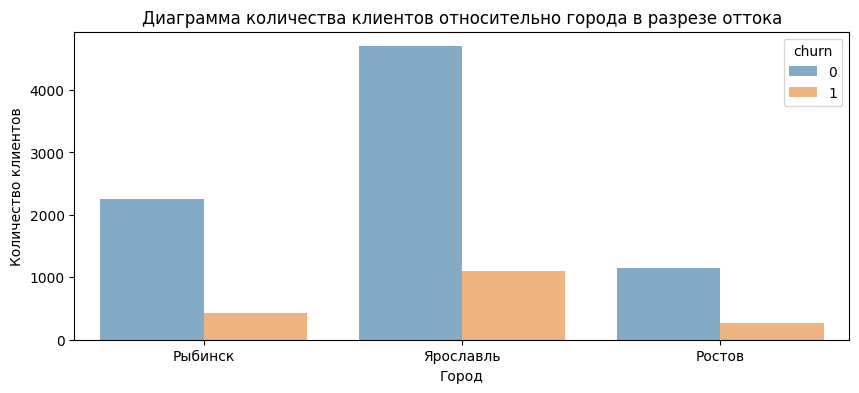

In [49]:
plt.figure(figsize=(10, 4))
sns.countplot(x='city', data=df, hue='churn', alpha=.6)
plt.title('Диаграмма количества клиентов относительно города в разрезе оттока')
plt.xlabel('Город')
plt.ylabel('Количество клиентов');

* Анализ по наличию кредитной карты

In [50]:
df_card_yeas = df.query('credit_card == 1').groupby('churn').agg({'userid': 'count'}
                                                            ).sort_values(by='userid', ascending=False).reset_index()
df_card_yeas['ratio'] = round(df_card_yeas['userid']/df_card_yeas['userid'].sum(), 2)
df_card_yeas

,churn,userid,ratio
0,0,5747,0.85
1,1,991,0.15


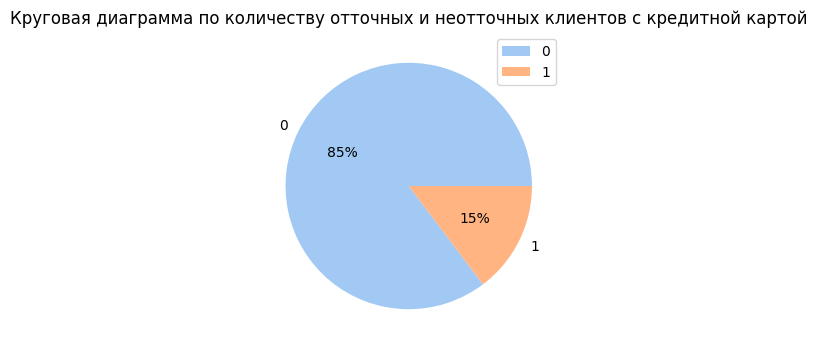

In [51]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette('pastel')[ 0:5 ]
plt.pie(labels = df_card_yeas['churn'], x=df_card_yeas['userid'], autopct='%.0f%%', colors=colors)
plt.legend()
plt.title('Круговая диаграмма по количеству отточных и неотточных клиентов с кредитной картой')
plt.show();

In [52]:
df_card_no = df.query('credit_card == 0').groupby('churn').agg({'userid': 'count'}
                                                            ).sort_values(by='userid', ascending=False).reset_index()
df_card_no['ratio'] = round(df_card_no['userid']/df_card_no['userid'].sum(), 2)
df_card_no

,churn,userid,ratio
0,0,2356,0.75
1,1,806,0.25


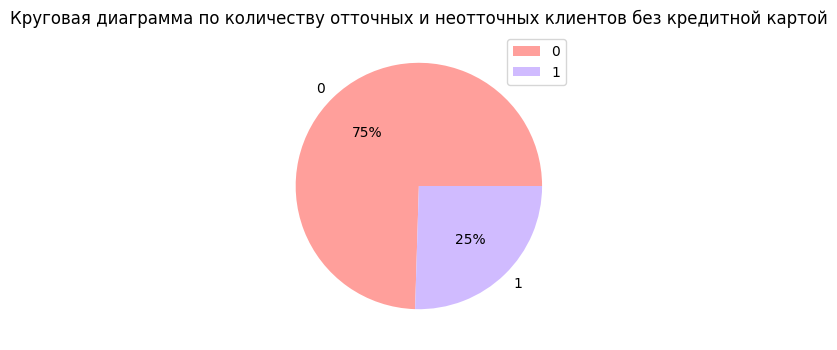

In [53]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette('pastel')[ 3:7 ]
plt.pie(labels = df_card_no['churn'], x=df_card_no['userid'], autopct='%.0f%%', colors=colors)
plt.legend()
plt.title('Круговая диаграмма по количеству отточных и неотточных клиентов без кредитной картой')
plt.show();

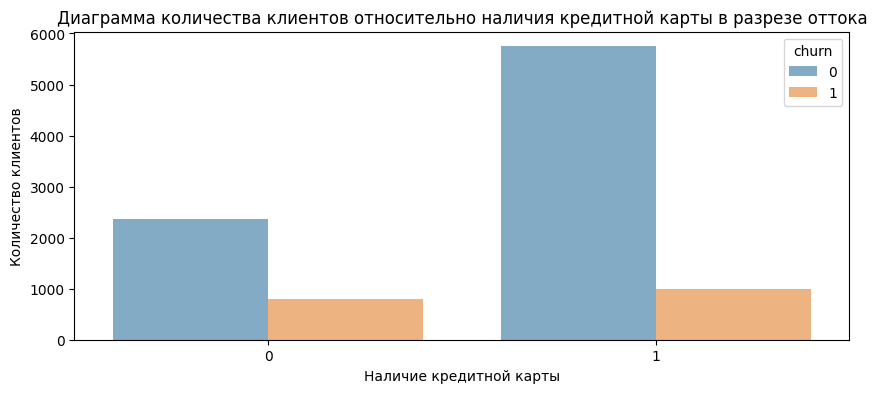

In [54]:
plt.figure(figsize=(10, 4))
sns.countplot(x='credit_card', data=df, hue='churn', alpha=.6)
plt.title('Диаграмма количества клиентов относительно наличия кредитной карты в разрезе оттока')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Количество клиентов');

* Анализ по показателю последней активности

In [55]:
df_activ_yeas = df.query('last_activity == 1').groupby('churn').agg({'userid': 'count'}
                                                            ).sort_values(by='userid', ascending=False).reset_index()
df_activ_yeas['ratio'] = round(df_activ_yeas['userid']/df_activ_yeas['userid'].sum(), 2)
df_activ_yeas

,churn,userid,ratio
0,0,3923,0.76
1,1,1259,0.24


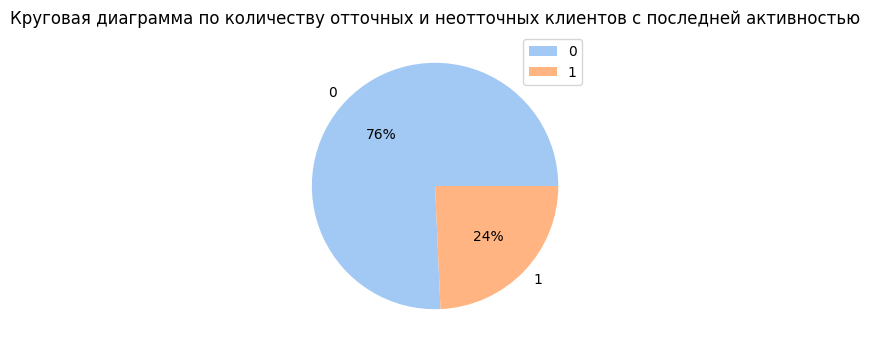

In [56]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette('pastel')[ 0:5 ]
plt.pie(labels = df_activ_yeas['churn'], x=df_activ_yeas['userid'], autopct='%.0f%%', colors=colors)
plt.legend()
plt.title('Круговая диаграмма по количеству отточных и неотточных клиентов с последней активностью')
plt.show();

In [57]:
df_activ_no = df.query('last_activity == 0').groupby('churn').agg({'userid': 'count'}
                                                            ).sort_values(by='userid', ascending=False).reset_index()
df_activ_no['ratio'] = round(df_activ_no['userid']/df_activ_no['userid'].sum(), 2)
df_activ_no

,churn,userid,ratio
0,0,4180,0.89
1,1,538,0.11


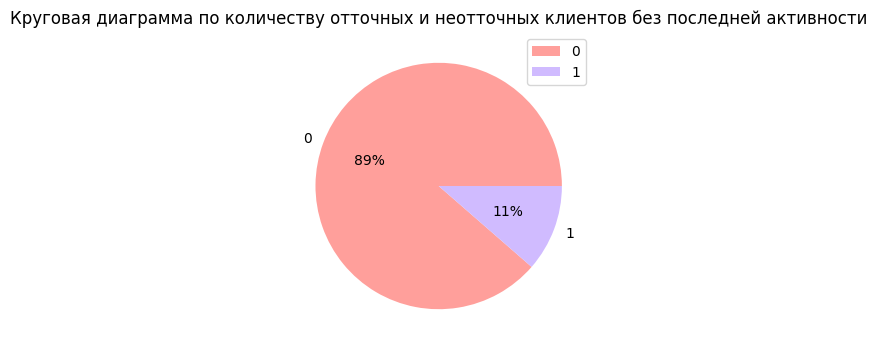

In [58]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette('pastel')[ 3:7 ]
plt.pie(labels = df_activ_no['churn'], x=df_activ_no['userid'], autopct='%.0f%%', colors=colors)
plt.legend()
plt.title('Круговая диаграмма по количеству отточных и неотточных клиентов без последней активности')
plt.show();

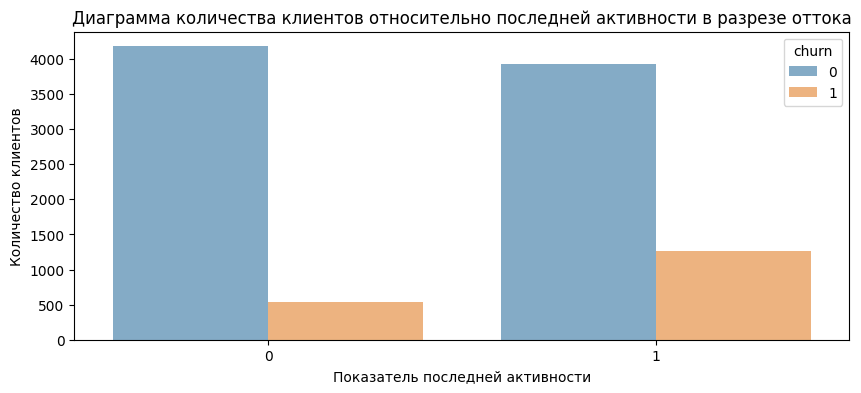

In [59]:
plt.figure(figsize=(10, 4))
sns.countplot(x='last_activity', data=df, hue='churn', alpha=.6)
plt.title('Диаграмма количества клиентов относительно последней активности в разрезе оттока')
plt.xlabel('Показатель последней активности')
plt.ylabel('Количество клиентов');

* Гистограммы различных категорий данных в разрезе оттока клиентов.

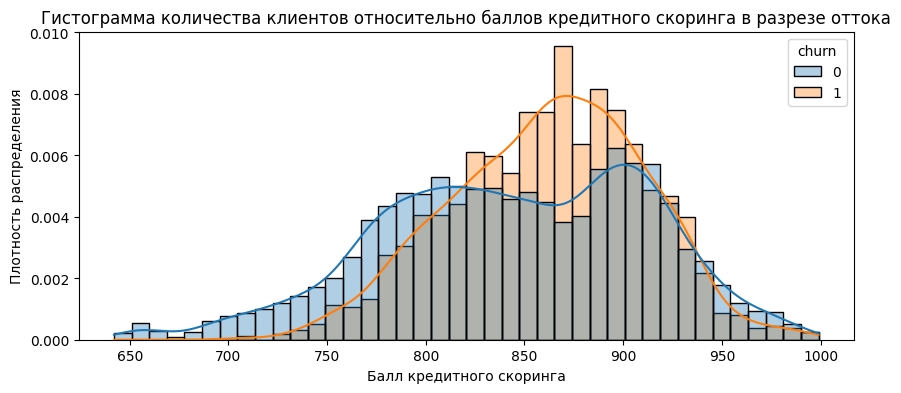

In [60]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='score', hue='churn', stat='density', 
             alpha=.35, common_norm=False, kde=True)
plt.title('Гистограмма количества клиентов относительно баллов кредитного скоринга в разрезе оттока')
plt.xlabel('Балл кредитного скоринга')
plt.ylabel('Плотность распределения');

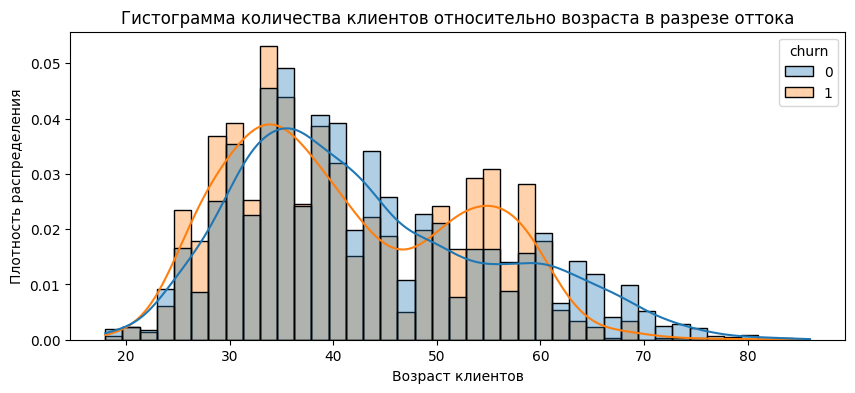

In [61]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='age', hue='churn', stat='density', common_norm=False, 
             alpha=.35, kde=True)
plt.title('Гистограмма количества клиентов относительно возраста в разрезе оттока')
plt.xlabel('Возраст клиентов')
plt.ylabel('Плотность распределения');

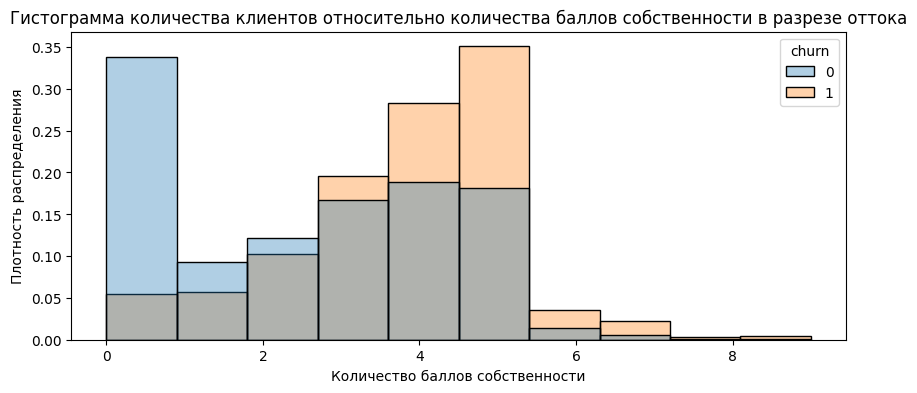

In [62]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='equity', hue='churn', stat='density', 
             common_norm=False, bins=10, alpha=.35)
plt.title('Гистограмма количества клиентов относительно количества баллов собственности в разрезе оттока')
plt.xlabel('Количество баллов собственности')
plt.ylabel('Плотность распределения');

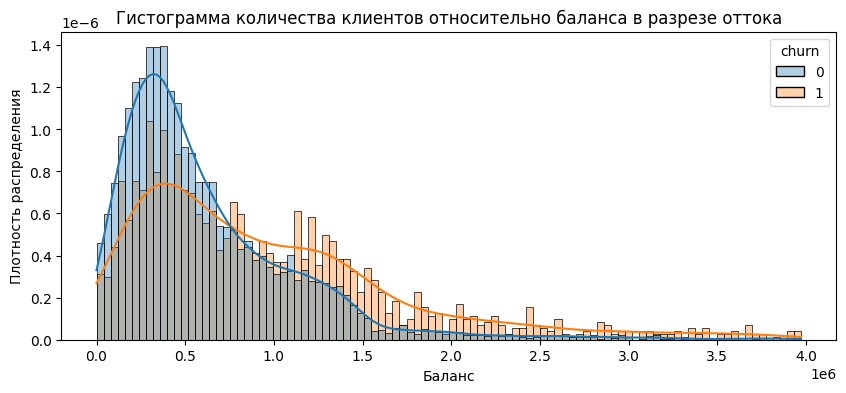

In [63]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df[df['balance'] < 4000000], x='balance', hue='churn', stat='density', common_norm=False, 
            alpha=.35, bins=100, kde=True)
plt.title('Гистограмма количества клиентов относительно баланса в разрезе оттока')
plt.xlabel('Баланс')
plt.ylabel('Плотность распределения');

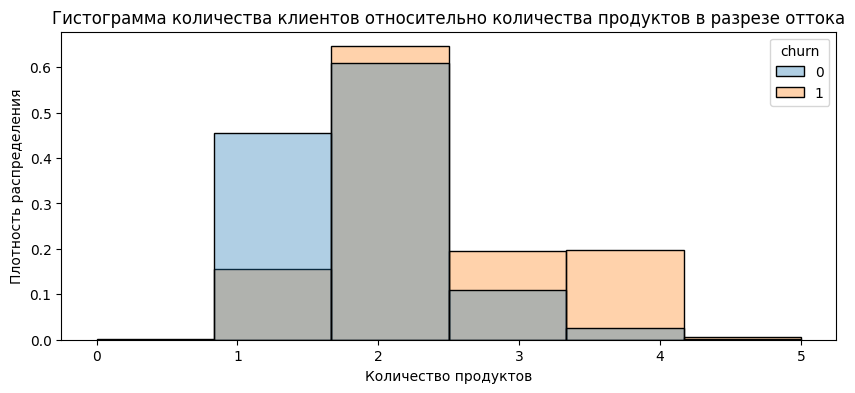

In [64]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='products', hue='churn', stat='density', common_norm=False, 
             alpha=.35, bins=6)
plt.title('Гистограмма количества клиентов относительно количества продуктов в разрезе оттока')
plt.xlabel('Количество продуктов')
plt.ylabel('Плотность распределения');

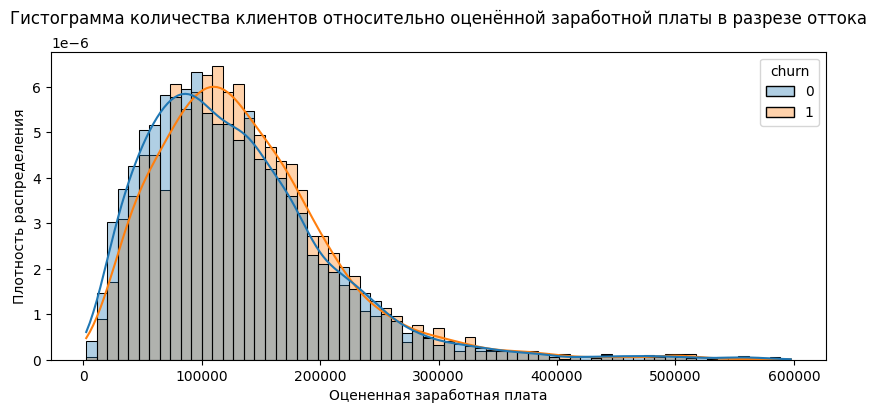

In [95]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df[df['est_salary'] < 600000], x='est_salary', hue='churn', stat='density', 
             common_norm=False, alpha=.35, kde=True)
plt.title('Гистограмма количества клиентов относительно оценённой заработной платы в разрезе оттока', pad=20)
plt.xlabel('Оцененная заработная плата')
plt.ylabel('Плотность распределения');

* Обратим внимание на распределения зарплаты и баланса для отточных и оставшихся клиентов.

In [66]:
print('Статистика баланса для неотточных клиентов')
print(df[df['churn'] == 0]['balance'].describe())

Статистика баланса для неотточных клиентов
count    5.859000e+03
mean     6.505850e+05
std      6.267924e+05
min      0.000000e+00
25%      2.781352e+05
50%      4.726390e+05
75%      8.465153e+05
max      5.960759e+06
Name: balance, dtype: float64


In [67]:
print('Статистика зп для неотточных клиентов')
print(df[df['churn'] == 0]['est_salary'].describe())

Статистика зп для неотточных клиентов
count      8103.000000
mean     140211.353098
std      116220.242097
min        2546.300000
25%       73012.450000
50%      117374.210000
75%      171966.805000
max      999965.310000
Name: est_salary, dtype: float64


In [68]:
print('Статистика баланса для отточных клиентов')
df[df['churn'] == 1]['balance'].describe()

Статистика баланса для отточных клиентов


count    1.785000e+03
mean     9.944622e+05
std      8.562284e+05
min      6.000000e+00
25%      3.836449e+05
50%      7.725296e+05
75%      1.323470e+06
max      5.763240e+06
Name: balance, dtype: float64

In [69]:
print('Статистика зп для отточных клиентов')
df[df['churn'] == 1]['est_salary'].describe()

Статистика зп для отточных клиентов


count      1797.000000
mean     140780.856722
std       96880.008096
min       10880.270000
25%       82687.760000
50%      124130.570000
75%      174481.890000
max      975960.360000
Name: est_salary, dtype: float64

In [70]:
print('Показатель оттока относительно всего датафрейма',
      round(len(df[df['churn'] == 1])/len(df)*100, 2), '%')

Показатель оттока относительно всего датафрейма 18.15 %


**Вывод по данным относительно оттока клиентов**
* <u>Показатель оттока</u> охватывает 18,19% датафрейма. Малость отточных клиентов по сравнению с неотточными объясняется их меньшим количеством в целом.
* К оттоку больше <u>склонны мужчины</u>, чем женщины.
* Относительно городов отток пропорционален количеству клиентов из каждого города, но можно заметить, что в <u>Рыбинске отток пропорционально меньше</u>.
* Отток <u>при наличие кредитной карты</u> ниже.
* Среди клиентов, кто имеет <u>последнею активность</u> отточных больше, чем у пассивных клиентов.
* <u>Score</u> отточных клиентов 800-950, что выше неоттока.
* К оттоку склонны все возраста.
* У уходящих клиентов <u>балл собственности</u> от 2 до 4. Показательно, что практически отсутствуют клиенты с нулевым баллом собственности, тогда как у оставшихся клиентов часто балл собственности 0.
* <u>Оценённая заработная плата</u> повторяют поведение распределения оставшихся клиентов.
* <u>Баланс</u> оттока выше.
* Отточные клиенты не имеют много <u>продуктов</u>, их обычно 2 или 3. 


**Итого**, <u>отточный</u> клиент банка обычно имеет score около 900, возраст около 30 или около 60, количество баллов собственности 3-5, 2 продукта, чаще отмечают свою активность. Преимущественнее клиент оказывается мужского пола с медианой баланса 770тыс. и медианой зп 124тыс.

<u>Постоянный</u> клиент банка обычно имеет score 800-900, возраст 30-40, количество баллов собственности 0 или 3-5, продуктов 1 или 2, есть кредитная карта, медиану баланса 470тыс., медиану зп 117тыс.

**3.2. Построим матрицы корреляции. Опроделим коррелирующиеся категории для каждого клиента.**

Кодирование категориальных данных города и пола.

In [71]:
df = pd.get_dummies(df, columns=['city'])
df.rename(columns = {'city_Ростов':'city_Rostov', 'city_Рыбинск':'city_Rybinsk', 'city_Ярославль':'city_Yaroslavl'}, 
          inplace = True )
df = pd.get_dummies(df, columns=['gender'])
df.rename(columns = {'gender_Ж':'gender_f', 'gender_М':'gender_m'}, inplace = True )
df.head()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Rostov,city_Rybinsk,city_Yaroslavl,gender_f,gender_m
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


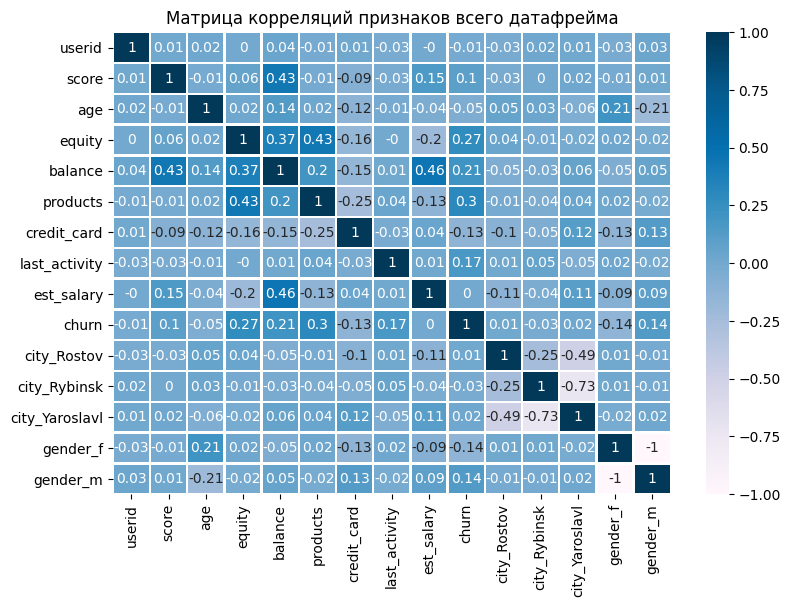

In [72]:
corr = df.corr().round(2)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot = True, linewidths=1, cmap= 'PuBu') 
plt.title('Матрица корреляций признаков всего датафрейма');

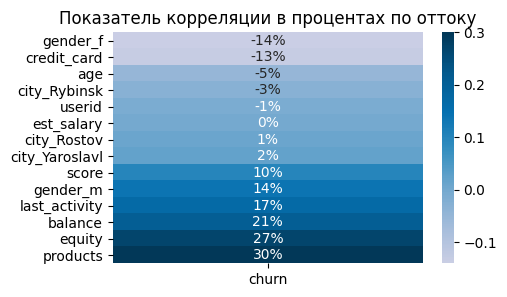

In [73]:
plt.figure(figsize=(5, 3))
sns.heatmap(df.corr().round(2).round(2).round(2).loc[:, ['churn']].drop('churn').sort_values('churn'), 
            annot=True, fmt=".0%", cmap="PuBu", center=0);
plt.title('Показатель корреляции в процентах по оттоку');

In [74]:
df = df[['userid', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity',
         'est_salary', 'city_Rostov', 'city_Rybinsk', 'city_Yaroslavl', 'gender_f', 'gender_m', 'churn']]

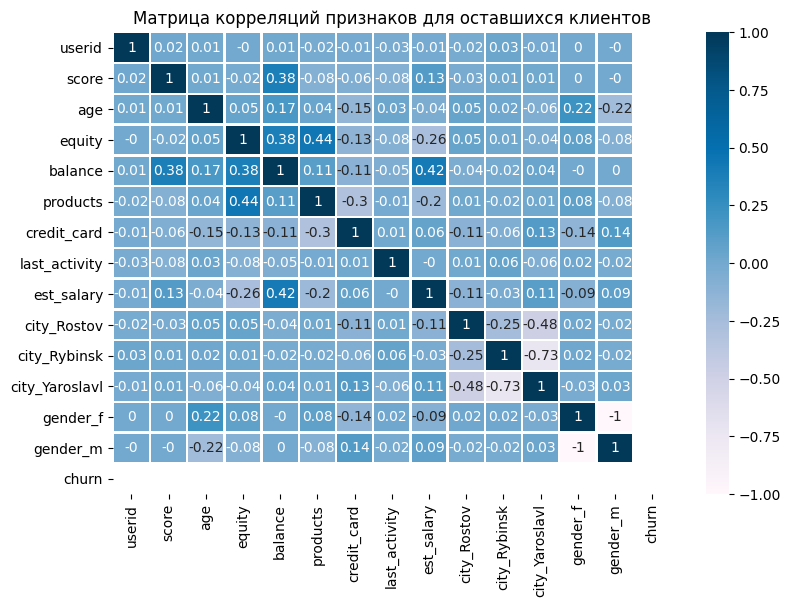

In [75]:
corr = df[df['churn'] == 0].corr().round(2)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot = True, linewidths=1, cmap= 'PuBu') 
plt.title('Матрица корреляций признаков для оставшихся клиентов');

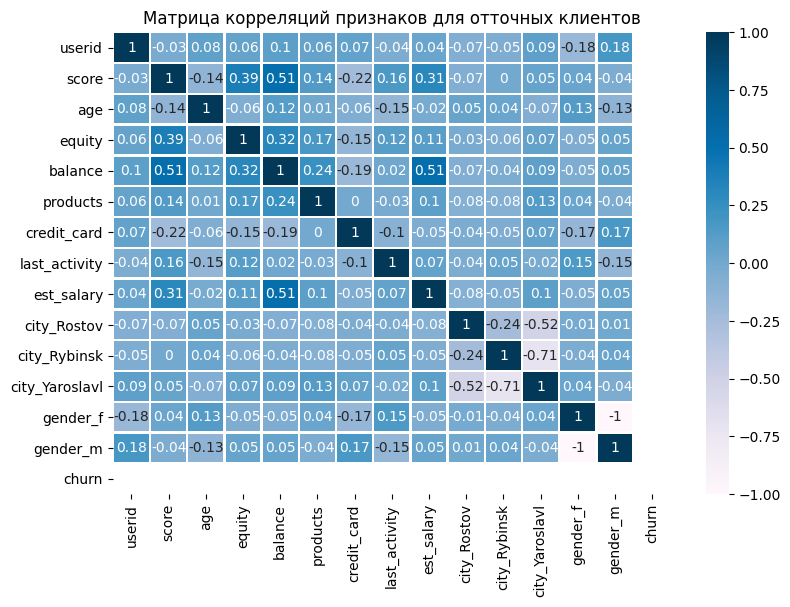

In [76]:
corr = df[df['churn'] == 1].corr().round(2)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot = True, linewidths=1, cmap= 'PuBu') 
plt.title('Матрица корреляций признаков для отточных клиентов');

**Вывод по матрицам корреляции.**
* Относительно **всего датафрейма** с показателем оттока количество продуктов коррелируется <u>слабо</u>. Оценённая заработная плата <u>умеренно</u> коррелируется с балансом. Так же баланс <u>умеренно</u> коррелируется с показателем скоринга.<br> 
* Для **оставшихся** в банке клиентов существует <u>умеренная</u> корреляция между продуктами и баллом собственности, между заработной платой и балансом, балансом и баллом собственности. Заработная плата и балл скоринга, продукты и баланс коррелируются <u>слабо</u>. <br> 
* **Отточные** клиенты имеют <u>заметную</u> корреляцию между заработной платой и балансом. Балл скоринка <u>умеренно</u> коррелируется с оценённой заработной платой и оценкой собственности. Так же <u>умеренно</u> коррелируются баланс и оценка собственности. <u>Слабую</u> корреляцию имеют количество продуктов и оценка собственности, количество пропусков и балл скоринга, количество продуктов и баланс, последняя активность и балл скоринга, последняя активность и оценка собственности, заработная плата и оценка собственности, баланс и возраст.<br> 
* По корреляционным матрицам можно сказать что <u>отточные клиенты имеют гораздо больше коррелирующих признаков</u>.

## 4. Проверка статистических гипотез.<a id='section_id_4'></a>

**4.1. Гипотезы относительно среднего дохода.**

Гипотеза H<sub>0</sub>: средний дохода ушедших и оставшихся клиентов равен.

Гипотеза H<sub>1</sub>: средний дохода ушедших и оставшихся клиентов различен.

- t-критерий используется для проверки равенства средних значений в двух выборках.

- Манна-Уитни проверяет достаточно ли мала зона перекрещивающихся значений между ранжированным рядом значений  в первой и второй выборке по признаку.

Используем t-тест Стьюдента, так как мы проверять средние двух совокупностей.

In [77]:
data_churn_1 = df.loc[df['churn'] == 1]['est_salary']
data_churn_0 = df.loc[df['churn'] == 0]['est_salary']
results = st.ttest_ind(
    data_churn_1, 
    data_churn_0, equal_var = False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.8282503837219021
Не получилось отвергнуть нулевую гипотезу


Наши данные не противоречат нулевой гипотезе. Нет оснований считать средние разными.

**4.2. Гипотезы относительно среднего возраста.**

Гипотеза H<sub>0</sub>: средний возраст ушедших и оставшихся клиентов равен.

Гипотеза H<sub>1</sub>: средний возраст ушедших и оставшихся клиентов различен.

In [78]:
df = df.dropna(subset =['age'])
data_churn_1 = df.loc[df['churn'] == 1]['age']
data_churn_0 = df.loc[df['churn'] == 0]['age']
results = st.ttest_ind(
    data_churn_1, 
    data_churn_0, equal_var = False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

9.887805592807541e-08
Отвергаем нулевую гипотезу


Наши данные показывают очень маловероятные результаты, поэтому они могут не противоречить альтернативной гипотезе H<sub>1</sub>.

## 5. Промежуточный итог.<a id='section_id_5'></a>

* У **отточных** клиентов больше баланс и оцененная заработная плата. Такие клиенты имеют высокий балл собственности, не зависят от кредитной карты, продуктов столько же как у всех, score тоже как у всех. Последняя активность имеется, но видимо для того, чтобы написать заявление или вывести деньги.
* **Неотточный** клиент имеет низкий балл собственности (чаще вообще он равен 0), баланс ниже и количество продуктов 1-2. 
* Среди отточных и неотточных клиентов нет сильного различия по среднему доходу, но есть различия по возрасту.
* Для того, чтобы хранить свои сбережения **уходящий** клиент вероятнее ищет банк с более высокими условиями накопления без привязки к кредитной истории.

## 6. Сегментация на основе стратегических показателей.<a id='section_id_6'></a>

Разделим данные на сегменты по признакам. Будем считать сегмент хорошим, если процент оттока в нём окажется выше в 2 раза и более.

In [79]:
df_leave = df.query('churn ==1')

**6.1. Сегмент 1.** Возраст, последняя активность, score.

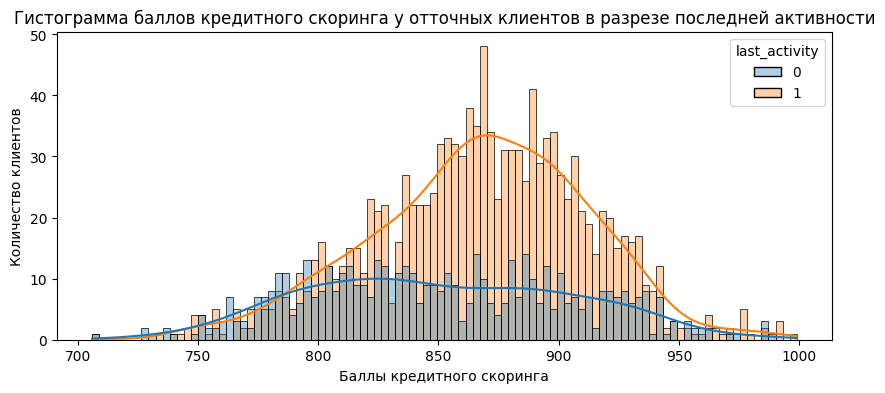

In [80]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df_leave, x='score', hue='last_activity', 
             alpha=.35, bins=100, kde=True)
plt.title('Гистограмма баллов кредитного скоринга у отточных клиентов в разрезе последней активности')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Количество клиентов');

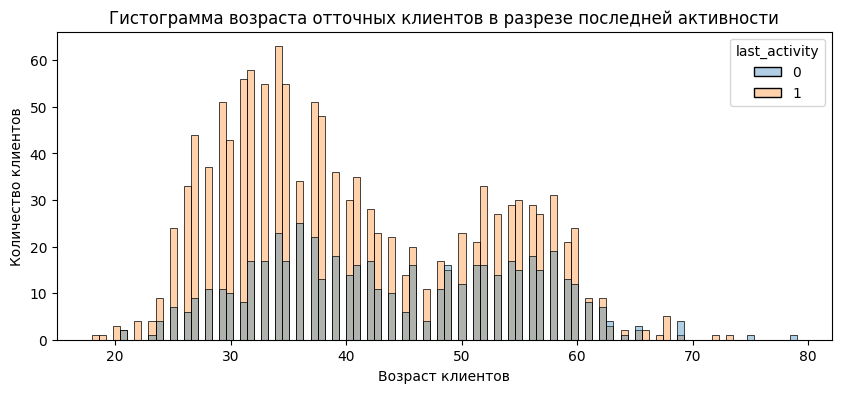

In [81]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df_leave, x='age', hue='last_activity',
             alpha=.35, bins=100)
plt.title('Гистограмма возраста отточных клиентов в разрезе последней активности')
plt.xlabel('Возраст клиентов')
plt.ylabel('Количество клиентов');

**Сегмент 1:** имеется последняя активность, возраст 20-60 лет, score 830-900.

In [82]:
print('Количество клиентов, подверженных уходу', len(df.query('churn == 1')))

Количество клиентов, подверженных уходу 1796


In [83]:
df_leave_1 = df.query('last_activity == 1 and age > 20 and age < 60 and score > 830 \
                        and score < 900')
print('Процент оттока сегмент_1:', round(len(df_leave_1[df_leave_1['churn'] == 1])/df_leave_1.shape[0]*100, 2), '%')
print('Процент оттока всего датафрейма:', round(len(df[df['churn'] == 1])/df.shape[0]*100, 2), '%')
print('Количество клиентов, подверженных уходу:', len(df.query('churn == 1')))
print('Количество клиентов, подверженных уходу в сегменте 1:', len(df_leave_1.query('churn == 1')))
print('В сегмент_1 попало', round(len(df_leave_1.query('churn == 1'))/len(df.query('churn == 1'))*100, 2), 
                                  '% отточных клиентов')

Процент оттока сегмент_1: 43.92 %
Процент оттока всего датафрейма: 18.19 %
Количество клиентов, подверженных уходу: 1796
Количество клиентов, подверженных уходу в сегменте 1: 668
В сегмент_1 попало 37.19 % отточных клиентов


In [84]:
print('Размер сегмент_1:', df_leave_1.shape[0])

Размер сегмент_1: 1521


**6.2. Сегмент 2.** Последняя активность, количество продуктов, наличие кредитной карты.

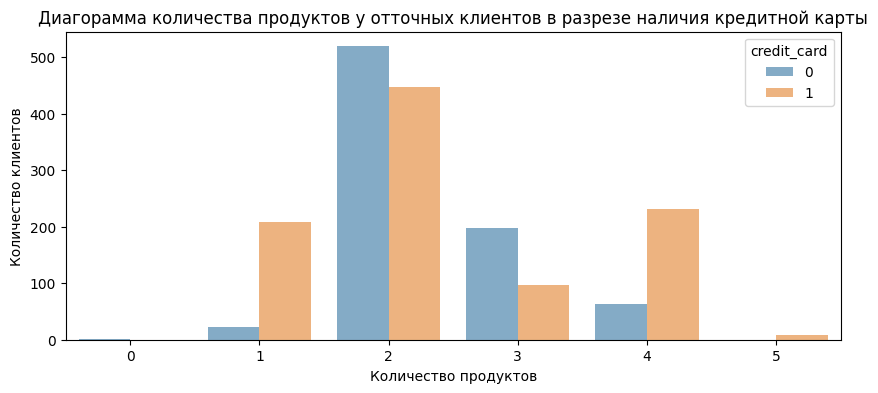

In [85]:
plt.figure(figsize=(10, 4))
sns.countplot(x='products', hue='credit_card', data=df_leave, alpha=.6)
plt.title('Диагорамма количества продуктов у отточных клиентов в разрезе наличия кредитной карты')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов');

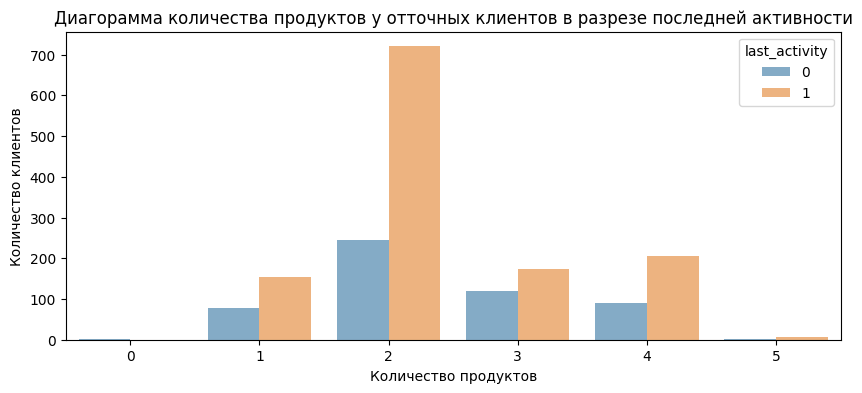

In [86]:
plt.figure(figsize=(10, 4))
sns.countplot(x='products', hue='last_activity', data=df_leave, alpha=.6)
plt.title('Диагорамма количества продуктов у отточных клиентов в разрезе последней активности')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов');

**Сегмент 2:** клиент имеет последнюю активность, количество продуктов 2-3 и не имеет кредитной карты.

In [87]:
df_leave_2 = df.query('credit_card == 0 and (products == 2 or products == 3) and last_activity == 1')
print('Процент оттока сегмент_2:', round(len(df_leave_2[df_leave_2['churn'] == 1])/df_leave_2.shape[0]*100, 2), '%')
print('Процент оттока всего датафрейма:', round(len(df[df['churn'] == 1])/df.shape[0]*100, 2), '%')
print('Количество клиентов, подверженных уходу:', len(df.query('churn == 1')))
print('Количество клиентов, подверженных уходу в сегменте 1:', len(df_leave_2.query('churn == 1')))
print('В сегмент 2 попало', round(len(df_leave_2.query('churn == 1'))/len(df.query('churn == 1'))*100, 2), 
                              '% отточных клиентов')

Процент оттока сегмент_2: 40.71 %
Процент оттока всего датафрейма: 18.19 %
Количество клиентов, подверженных уходу: 1796
Количество клиентов, подверженных уходу в сегменте 1: 548
В сегмент 2 попало 30.51 % отточных клиентов


In [88]:
print('Размер сегмент_2:', df_leave_2.shape[0])

Размер сегмент_2: 1346


**6.3. Сегмент 3.** Рассмотрим клиентов из самого популярного города среди нашего датафрейма - Ярославля.

In [89]:
df_leave_Y = df.query('city_Yaroslavl ==1')

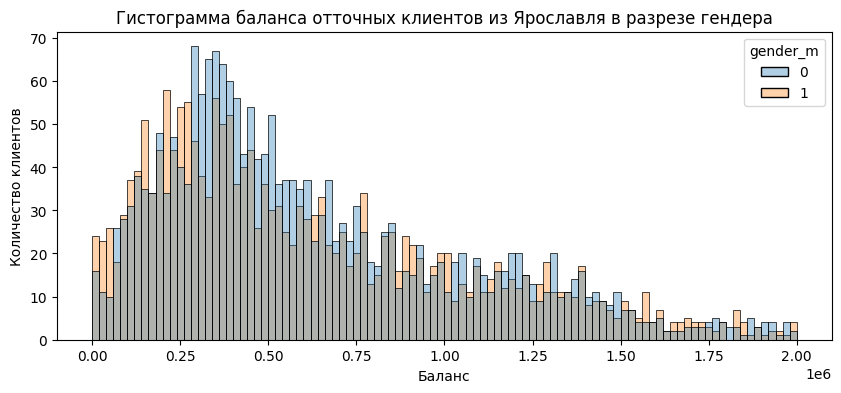

In [90]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df_leave_Y.query('balance < 2000000'), x='balance', hue='gender_m', 
              alpha=.35, bins=100)
plt.title('Гистограмма баланса отточных клиентов из Ярославля в разрезе гендера')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов');

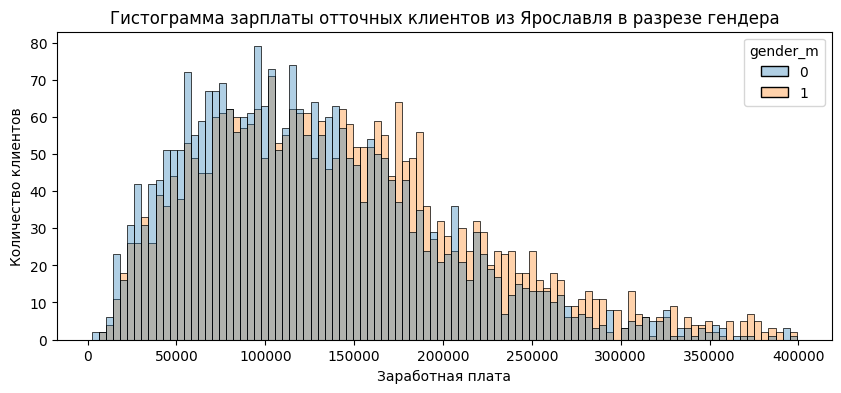

In [91]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df_leave_Y.query('est_salary < 400000'), x='est_salary', hue='gender_m', 
              alpha=.35, bins=100)
plt.title('Гистограмма зарплаты отточных клиентов из Ярославля в разрезе гендера')
plt.xlabel('Заработная плата')
plt.ylabel('Количество клиентов');

In [92]:
print('Коэффициент корреляции баланса и зарплаты клиентов из Ярославля:',
round(df_leave_Y['est_salary'].corr(df_leave_Y['balance']), 2))

Коэффициент корреляции баланса и зарплаты клиентов из Ярославля: 0.47


**Сегмент 3:** клиент из города Ярославль мужского пола с балансом на счёте ниже 2млн. и зарплатой ниже 300 тыс.

In [93]:
df_leave_3 = df.query('city_Yaroslavl ==1 and balance < 2000000 and\
                      gender_m == 1 and est_salary < 300000')
print('Процент оттока сегмент_2:', round(len(df_leave_3[df_leave_3['churn'] == 1])/df_leave_3.shape[0]*100, 2), '%')
print('Процент оттока всего датафрейма:', round(len(df[df['churn'] == 1])/df.shape[0]*100, 2), '%')
print('Количество клиентов, подверженных уходу:', len(df.query('churn == 1')))
print('Количество клиентов, подверженных уходу в сегменте 1:', len(df_leave_3.query('churn == 1')))
print('В сегмент 3 попало', round(len(df_leave_3.query('churn == 1'))/len(df.query('churn == 1'))*100, 2), 
                              '% отточных клиентов')

Процент оттока сегмент_2: 30.01 %
Процент оттока всего датафрейма: 18.19 %
Количество клиентов, подверженных уходу: 1796
Количество клиентов, подверженных уходу в сегменте 1: 581
В сегмент 3 попало 32.35 % отточных клиентов


In [94]:
print('Размер сегмент_2:', df_leave_3.shape[0])

Размер сегмент_2: 1936


## 7. Выводы и рекомендации.<a id='section_id_7'></a>

**Сегмент 1:**  
* последняя активность +;
* возраст 20-60 лет, 
* score 850-900, 
* процент оттока 43,92%,
* в сегменте 37,19% отточных клиентов.

Клиент имеет последнюю активность, работоспособный возраст и высокий скоринг. Клиента ещё можно удержать, он посещает банк и ему можно предложить выгодные условия. Данная категория клиентов работоспособна и платёжеспособна. Высокий балл скоринга говорит о том, что клиент пользуется услугой кредита в банке. Клиенту можно предложить выгодные условия кредита с большими лимитами и весомым беспроцентным периодом. Ускорив время решения на обращение по кредиту расположит клиента. Введя онлайн заявку и кредитный калькулятор занятой клиент сократит время на оформление кредита.

**Сегмент 2:** 

* кредитная карта -,
* количество продуктов 2-3,
* последней активностью +,
* процент оттока 40,71%,
* в сегменте 30,51% отточных клиентов

Двух продуктов клиенту достаточно, чтобы принять решение об уходе. Клиентов может заинтересовать кредитная карта с выгодными условиями. Кредитная карта с большим лимитом может помочь произвести дорогие покупки и позволит расширить количество используемых продуктов. Большой беспроцентный период и высокий кешбек могут стать мотиваций остаться клиентом нашего банка.

**Сегмент 3:** 

* город Ярославль, 
* мужской пол,
* баланс на счёте ниже 2млн.,
* оцененная заработная плата ниже 300 тыс.,.
* процент оттока 30,01%,
* в сегменте 32,35% отточных клиентов.


Клиентам мужского пола с низким балансом вероятно интереснее держать сбережения на инвестиционных счетах. Так же клиенту можно предложить выгодные условия хранения и работы своих сбережений. Выгодные депозитные программы с высокими процентными ставками, инвестиционные услуги различного вида, различные операции с ценными бумагами может заинтересовать клиента.